<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/backtestBacktrading/blob/main/fastquant/SMAeRSIEtherHoratrader20202021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Backtest usando fastquant

In [1]:
#instalando fastquant
!pip install fastquant

     |████████████████████████████████| 5.3 MB 6.9 MB/s 
     |████████████████████████████████| 1.5 MB 25.0 MB/s 
     |████████████████████████████████| 503 kB 42.2 MB/s 
     |████████████████████████████████| 156 kB 54.4 MB/s 
     |████████████████████████████████| 97 kB 2.8 MB/s 
     |████████████████████████████████| 2.2 MB 26.9 MB/s 
     |████████████████████████████████| 410 kB 59.3 MB/s 
     |████████████████████████████████| 6.3 MB 25.8 MB/s 
     |████████████████████████████████| 138 kB 58.9 MB/s 
     |████████████████████████████████| 191 kB 55.3 MB/s 
     |████████████████████████████████| 843 kB 41.6 MB/s 
     |████████████████████████████████| 1.1 MB 39.2 MB/s 
     |████████████████████████████████| 3.6 MB 36.8 MB/s 
     |████████████████████████████████| 271 kB 71.9 MB/s 
     |████████████████████████████████| 160 kB 58.9 MB/s 
     |████████████████████████████████| 291 kB 53.4 MB/s 
     |████████████████████████████████| 192 kB 57.8 MB/s 
     |███████████

#Pega dados da Binance

In [2]:
# preço do bitcoin
from fastquant import get_crypto_data

crypto = get_crypto_data("ETH/USDT", 
                         "2020-10-01", 
                         "2021-10-31",
                         time_resolution='1h'
                        )

In [3]:
crypto.tail()

,open,high,low,close,volume
dt,,,,,
2021-10-30 20:00:00,4336.63,4344.29,4302.38,4309.51,11343.6524
2021-10-30 21:00:00,4309.51,4317.36,4282.36,4283.05,8939.3624
2021-10-30 22:00:00,4283.06,4299.33,4241.00,4287.17,19784.5833
2021-10-30 23:00:00,4286.59,4326.30,4278.00,4322.68,14866.7667
2021-10-31 00:00:00,4322.68,4393.64,4316.09,4383.24,31348.2898


#Executando Backtesting com conjunto de valores

In [4]:
# Usando Cruzamento de Médias Móveis 
from fastquant import backtest

results = backtest('smac', 
                   crypto, 
                   fast_period=[7,14,21,28], 
                   slow_period=[30,45,60,75],
                   plot=False,
                   verbose=False
                  )

In [5]:
#tabela de resultados
results.head()

,strat_id,init_cash,buy_prop,sell_prop,fractional,slippage,single_position,commission,stop_loss,stop_trail,take_profit,execution_type,channel,symbol,allow_short,short_max,add_cash_amount,add_cash_freq,invest_div,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,3,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,75,2.240960,0.005659,3.162291,316.229074,230,8.134389,83254.67,"{'len': 1424, 'drawdown': 28.09023208817586, '...",25.828683,67,1.632787,840235.51,940235.51,97,0.402062,39,57,40669.990256,40.669990,-13805.690000,-13.805690,283829.76,283.82976,-66924.60,-66.92460
1,8,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,21,30,2.216211,0.005596,3.097251,309.725067,230,4.512028,43342.24,"{'len': 3081, 'drawdown': 42.751018085459805, ...",39.351289,114,1.760202,817251.16,917251.16,176,0.465909,82,94,21541.675000,21.541675,-10097.512660,-10.097513,93416.00,93.41600,-37605.60,-37.60560
2,7,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,75,2.112656,0.005335,2.835950,283.595032,3584,11.952179,112264.68,"{'len': 3584, 'drawdown': 35.702763769177665, ...",34.008605,149,2.095211,727017.45,827017.45,78,0.461538,36,41,42872.918333,42.872918,-20851.555366,-20.851555,357398.80,357.39880,-53237.76,-53.23776
3,2,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,2.083521,0.005261,2.765487,276.548665,230,7.584410,65923.20,"{'len': 1277, 'drawdown': 29.10284427408255, '...",25.374912,57,1.481002,703270.37,803270.37,121,0.388430,47,74,30842.726170,30.842726,-10085.645405,-10.085645,224142.24,224.14224,-41553.52,-41.55352
4,9,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,21,45,2.076772,0.005244,2.749348,274.934847,33,3.119072,25687.25,"{'len': 3739, 'drawdown': 41.352945536819576, ...",38.959556,155,2.091549,697867.09,797867.09,117,0.427350,50,67,34013.202800,34.013203,-14967.060448,-14.967060,190764.64,190.76464,-95015.83,-95.01583


ROI de 840,24%

In [6]:
#pega os melhores parâmetros da linha superior(anterior)
fast_best, slow_best = results.iloc[0][["fast_period","slow_period"]]
fast_best, slow_best

(7, 75)

#Roda o Backtest usando os valores ótimos encontrados anteriormente

In [7]:
import matplotlib as pl
pl.style.use("default")
pl.rcParams["figure.figsize"] = (9,5)

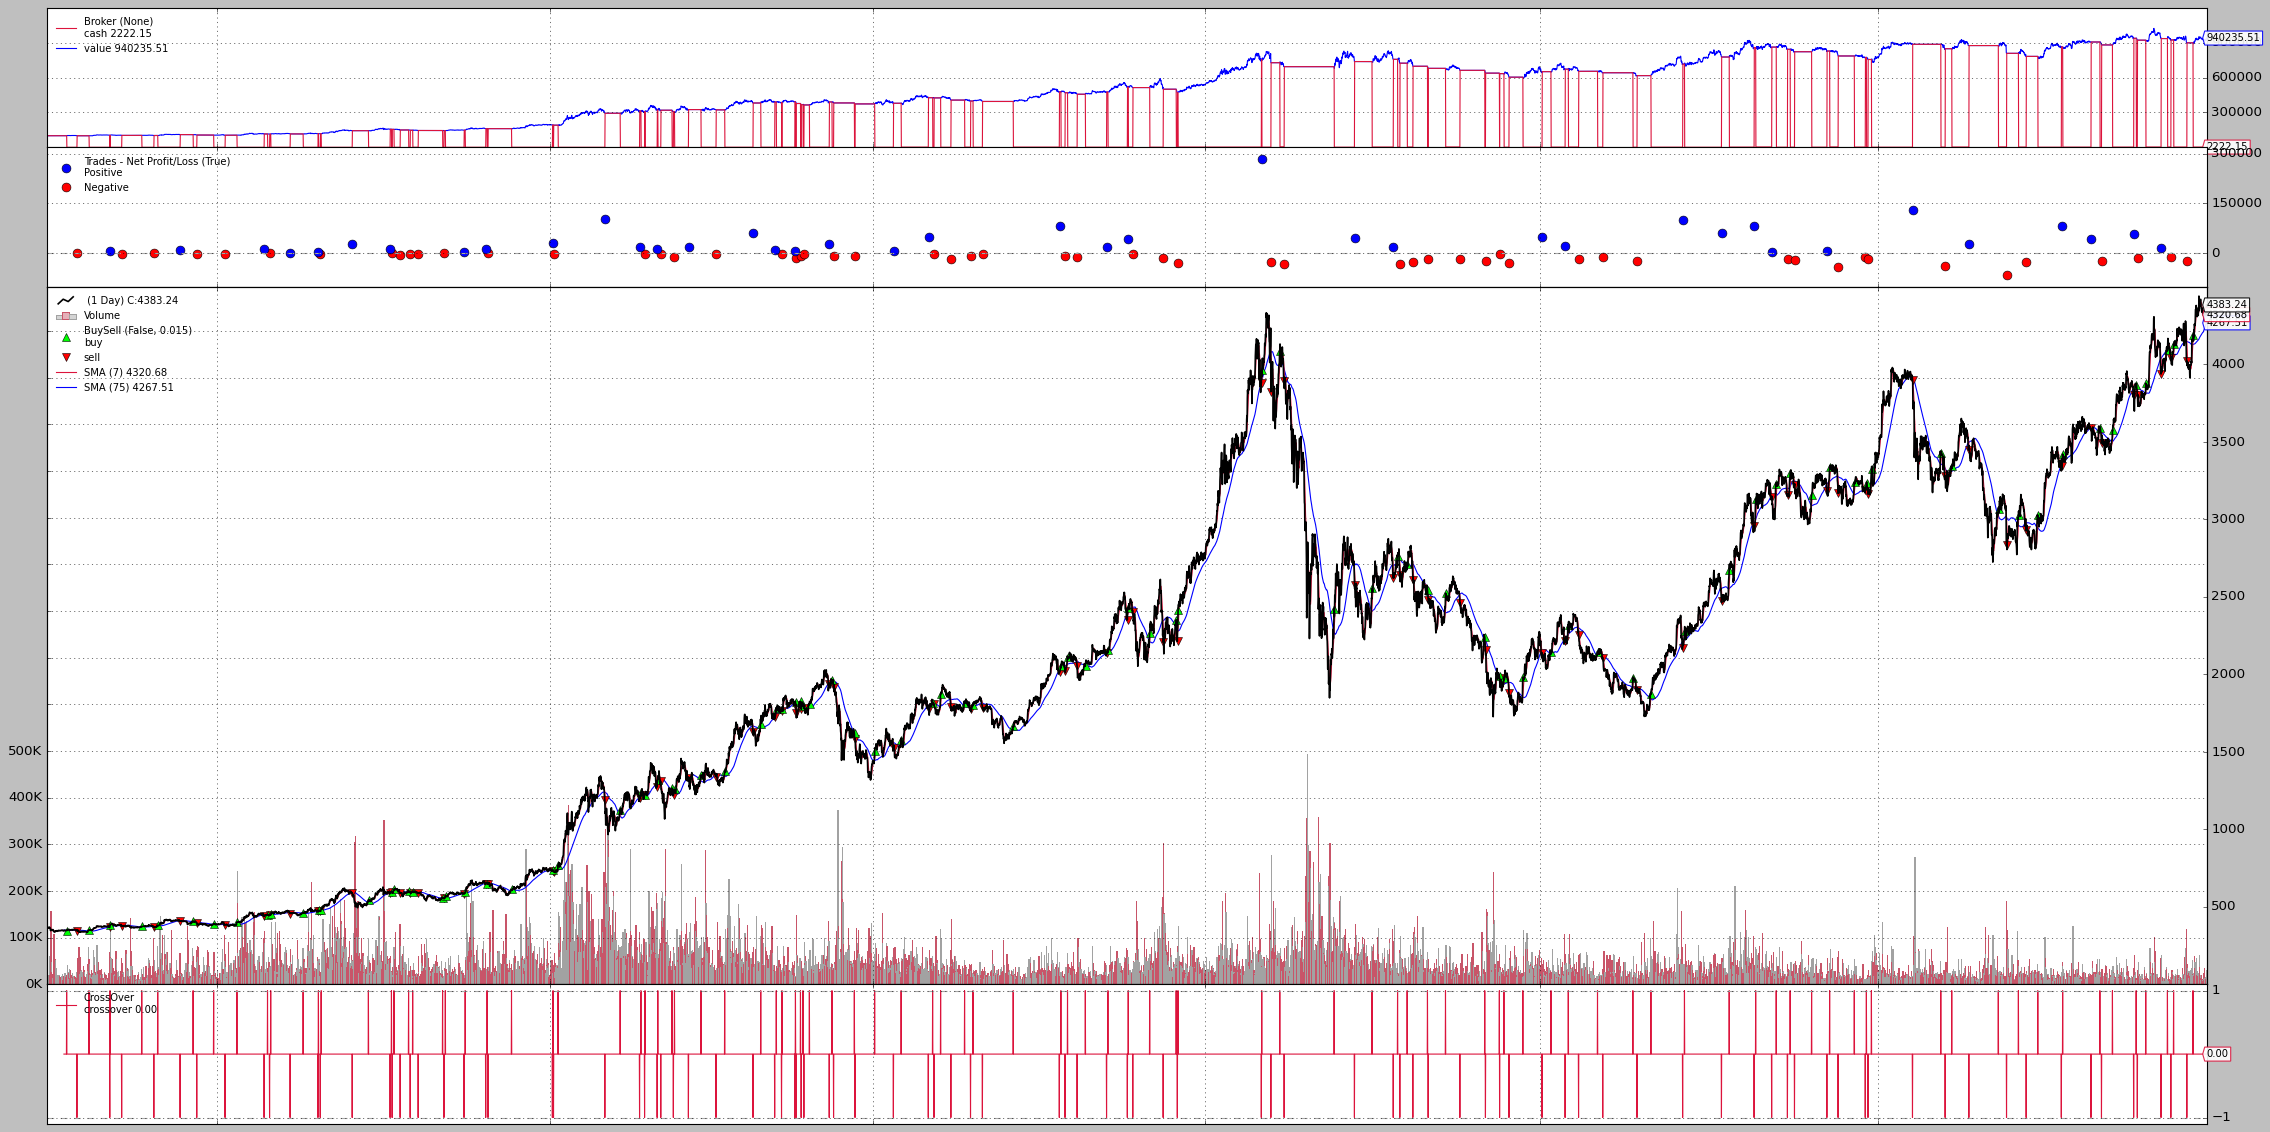

In [8]:
#mostra resultados com novos valores otimizados
results = backtest('smac', 
                   crypto, 
                   fast_period=fast_best, 
                   slow_period=slow_best,
                   plot=True,
                   verbose=False
                  )

#Acessando histórico de transações
Isso é feito definindo return_history = True.

##Estratégia Simples

In [9]:
results, history = backtest('smac', 
                               crypto, 
                               fast_period=fast_best, 
                               slow_period=slow_best,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

In [10]:
results

,strat_id,init_cash,buy_prop,sell_prop,fractional,slippage,single_position,commission,stop_loss,stop_trail,take_profit,execution_type,channel,symbol,allow_short,short_max,add_cash_amount,add_cash_freq,invest_div,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,75,2.24096,0.005659,3.162291,316.229074,230,8.134389,83254.67,"{'len': 1424, 'drawdown': 28.09023208817586, '...",25.828683,67,1.632787,840235.51,940235.51,97,0.402062,39,57,40669.990256,40.66999,-13805.69,-13.80569,283829.76,283.82976,-66924.6,-66.9246


 melhor ROI é de 840,24%

In [11]:
history.keys()

dict_keys(['orders', 'periodic', 'indicators'])

In [12]:
orders = history['orders']
orders

,strat_id,strat_name,dt,type,price,size,value,commission,pnl
0,0,fast_period7_slow_period75,2020-10-04 16:00:00,buy,346.69,288,99846.72,0.0,0.00
1,0,fast_period7_slow_period75,2020-10-06 13:00:00,sell,345.71,-288,99846.72,0.0,-282.24
2,0,fast_period7_slow_period75,2020-10-08 18:00:00,buy,350.45,284,99527.80,0.0,0.00
3,0,fast_period7_slow_period75,2020-10-12 13:00:00,sell,368.84,-284,99527.80,0.0,5222.76
4,0,fast_period7_slow_period75,2020-10-12 14:00:00,buy,383.70,273,104750.10,0.0,0.00
...,...,...,...,...,...,...,...,...,...
188,0,fast_period7_slow_period75,2021-10-23 22:00:00,buy,4091.19,228,932791.32,0.0,0.00
189,0,fast_period7_slow_period75,2021-10-24 13:00:00,sell,4038.72,-228,932791.32,0.0,-11963.16
190,0,fast_period7_slow_period75,2021-10-25 01:00:00,buy,4131.97,223,921429.31,0.0,0.00
191,0,fast_period7_slow_period75,2021-10-27 11:00:00,sell,4021.28,-223,921429.31,0.0,-24683.87


O valor final dos resultados pode ser calculado a partir da comissão e pnl (lucro e perda = profit e loss) de todas as transações fechadas (compradas e vendidas) no histórico:

In [13]:
r = results.squeeze()
r.final_value

940235.5099999999

In [14]:
r.init_cash + orders.pnl.sum() - orders.commission.sum()

899205.29

# estratégia de sinal único com pesquisa de grade

In [15]:
results, history = backtest('smac', 
                               crypto, 
                               fast_period=[7,14,21], 
                               slow_period=[30,45,60],
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

In [16]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array(['fast_period7_slow_period30', 'fast_period7_slow_period45',
        'fast_period7_slow_period60', 'fast_period14_slow_period30',
        'fast_period14_slow_period45', 'fast_period14_slow_period60',
        'fast_period21_slow_period30', 'fast_period21_slow_period45',
        'fast_period21_slow_period60'], dtype=object))

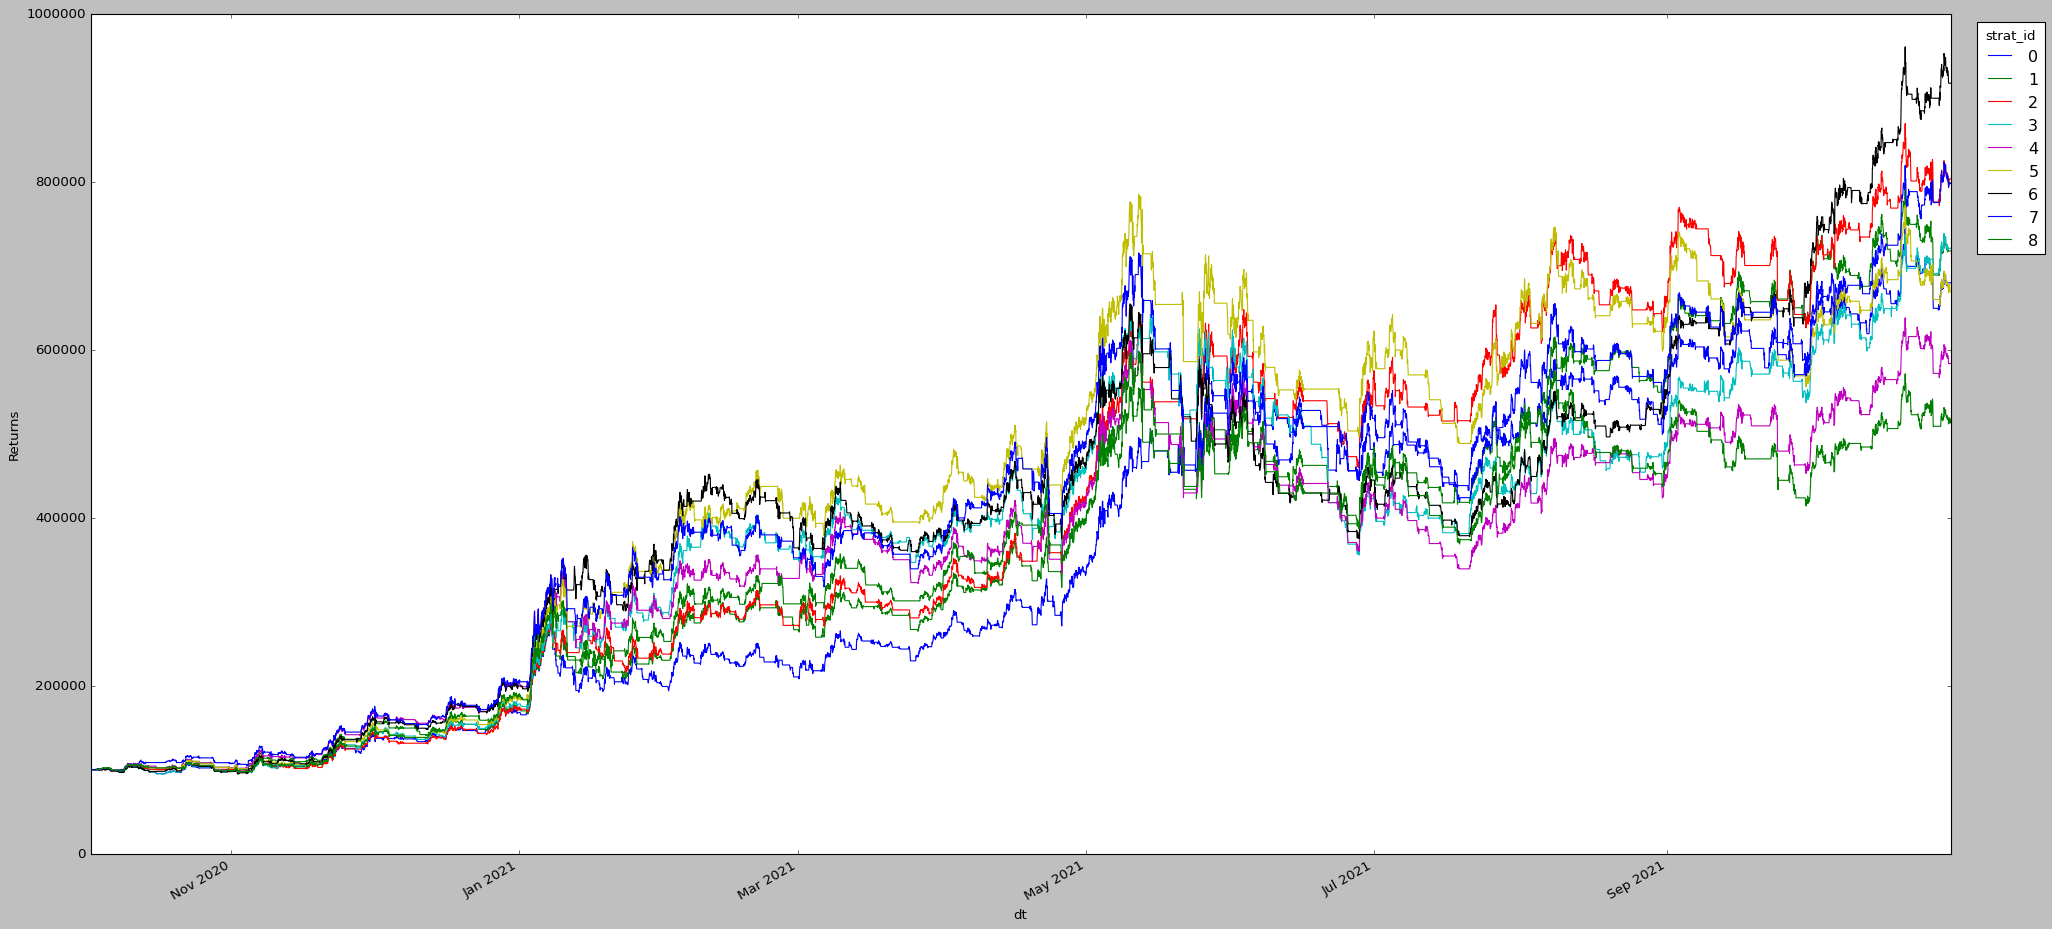

In [17]:
key = 'strat_id'
periodic = history['periodic']
g = periodic.set_index('dt').groupby(key)
axs = g.portfolio_value.plot(legend=key)
axs[0].set_ylabel('Returns')
axs[0].legend(g.groups, title=key, bbox_to_anchor=(1.01, 1), loc='upper left')

# Estratégia multi sinal

In [18]:
# essa estratégia usa varios sinais(Cruzamento de média movel e RSI)
from fastquant import backtest

strats= {
       'smac': {
           'fast_period': 7, 
           'slow_period': 60
            },
        'rsi': {
            'rsi_upper': 70,
            'rsi_lower': 30 
        }
   }
results, history = backtest('multi', 
                               crypto, 
                               strats=strats,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

2021-10-31T00:00:00, ===Global level arguments===
2021-10-31T00:00:00, init_cash : 100000
2021-10-31T00:00:00, buy_prop : 1
2021-10-31T00:00:00, sell_prop : 1
2021-10-31T00:00:00, commission : 0
2021-10-31T00:00:00, stop_loss : 0
2021-10-31T00:00:00, stop_trail : 0
2021-10-31T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 7
slow_period : 60
2021-10-31T00:00:00, ===Global level arguments===
2021-10-31T00:00:00, init_cash : 100000
2021-10-31T00:00:00, buy_prop : 1
2021-10-31T00:00:00, sell_prop : 1
2021-10-31T00:00:00, commission : 0
2021-10-31T00:00:00, stop_loss : 0
2021-10-31T00:00:00, stop_trail : 0
2021-10-31T00:00:00, take_profit : 0
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 30
2020-10-01T17:00:00, BUY CREATE, 346.25
2020-10-01T17:00:00, Cash: 100000.0
2020-10-01T17:00:00, Price: 346.25
2020-10-01T17:00:00, Buy prop size: 288.52014411581206
2020-10-01T17:00:00, Afforded size: 288.52014411581206
2020-10-01T17:00:00, Final size:

In [19]:
results

,strat_id,init_cash,buy_prop,sell_prop,smac.fractional,smac.slippage,smac.single_position,smac.commission,smac.stop_loss,smac.stop_trail,smac.take_profit,execution_type,smac.channel,smac.symbol,smac.allow_short,smac.short_max,smac.add_cash_amount,smac.add_cash_freq,smac.invest_div,smac.fast_period,smac.slow_period,rsi.fractional,rsi.slippage,rsi.single_position,rsi.commission,rsi.stop_loss,rsi.stop_trail,rsi.take_profit,rsi.channel,rsi.symbol,rsi.allow_short,rsi.short_max,rsi.add_cash_amount,rsi.add_cash_freq,rsi.invest_div,rsi.rsi_period,rsi.rsi_upper,rsi.rsi_lower,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,70,30,0.740368,0.00187,0.601824,60.182425,4019,15.413195,38205.66,"{'len': 4019, 'drawdown': 43.15471292920242, '...",41.298564,170,2.339129,109670.65,209670.65,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ROI de 109,67%

In [20]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([0]),
 array(['smac.fast_period7_slow_period60', 'rsi.rsi_upper70_rsi_lower30'],
       dtype=object))

In [21]:
from fastquant import backtest

strats= {
       'smac': {
           'fast_period': [7,14], 
           'slow_period': [30,60]
            },
        'rsi': {
            'rsi_upper': [70,80],
            'rsi_lower': [20,30] 
        }
   }
results, history = backtest('multi', 
                               crypto, 
                               strats=strats,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

A saída de streaming foi truncada nas últimas 5000 linhas.
2021-02-05T12:00:00, Buy prop size: 182.78913410026607
2021-02-05T12:00:00, Afforded size: 182.78913410026607
2021-02-05T12:00:00, Final size: 182
2021-02-05T13:00:00, BUY EXECUTED, Price: 1661.16, Cost: 302331.12, Comm: 0.00, Size: 182.00
2021-02-06T11:00:00, SELL CREATE, 1674.68
2021-02-06T12:00:00, SELL EXECUTED, Price: 1679.67, Cost: 302331.12, Comm: 0.00, Size: -182.00
2021-02-07T14:00:00, BUY CREATE, 1571.31
2021-02-07T14:00:00, Cash: 307314.45999999996
2021-02-07T14:00:00, Price: 1571.31
2021-02-07T14:00:00, Buy prop size: 195.38312143845107
2021-02-07T14:00:00, Afforded size: 195.38312143845107
2021-02-07T14:00:00, Final size: 195
2021-02-07T15:00:00, BUY EXECUTED, Price: 1571.31, Cost: 306405.45, Comm: 0.00, Size: 195.00
2021-02-10T18:00:00, SELL CREATE, 1742.69
2021-02-10T19:00:00, SELL EXECUTED, Price: 1741.74, Cost: 306405.45, Comm: 0.00, Size: -195.00
2021-02-11T14:00:00, BUY CREATE, 1796.55
2021-02-11T14:00:00, Ca

In [22]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array(['smac.fast_period7_slow_period30', 'rsi.rsi_upper70_rsi_lower20',
        'rsi.rsi_upper70_rsi_lower30', 'rsi.rsi_upper80_rsi_lower20',
        'rsi.rsi_upper80_rsi_lower30', 'smac.fast_period7_slow_period60',
        'smac.fast_period14_slow_period30',
        'smac.fast_period14_slow_period60'], dtype=object))

In [23]:
results

,strat_id,init_cash,buy_prop,sell_prop,smac.fractional,smac.slippage,smac.single_position,smac.commission,smac.stop_loss,smac.stop_trail,smac.take_profit,execution_type,smac.channel,smac.symbol,smac.allow_short,smac.short_max,smac.add_cash_amount,smac.add_cash_freq,smac.invest_div,smac.fast_period,smac.slow_period,rsi.fractional,rsi.slippage,rsi.single_position,rsi.commission,rsi.stop_loss,rsi.stop_trail,rsi.take_profit,rsi.channel,rsi.symbol,rsi.allow_short,rsi.short_max,rsi.add_cash_amount,rsi.add_cash_freq,rsi.invest_div,rsi.rsi_period,rsi.rsi_upper,rsi.rsi_lower,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,11,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,30,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,30,2.088759,0.005275,2.778059,277.805857,33,2.404296,19892.70,"{'len': 3129, 'drawdown': 42.25422267462103, '...",40.894978,130,1.642234,707488.80,807488.80,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,30,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,20,2.005311,0.005064,2.582665,258.266468,169,4.664030,36341.26,"{'len': 1992, 'drawdown': 26.878544919204437, ...",24.372538,69,1.435873,642840.20,742840.20,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,30,2.003450,0.005059,2.578426,257.842588,169,5.170606,40428.34,"{'len': 3532, 'drawdown': 57.232887801960835, ...",54.797987,112,2.289300,641459.56,741459.56,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,30,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,30,1.964847,0.004962,2.491589,249.158948,169,4.682458,35044.77,"{'len': 1891, 'drawdown': 37.30880279954331, '...",34.056119,78,1.620699,613381.98,713381.98,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,30,1.875265,0.004736,2.298112,229.811194,92,2.814436,18888.90,"{'len': 2247, 'drawdown': 48.766293814418916, ...",46.361050,93,2.362463,552254.44,652254.44,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,30,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,20,1.815202,0.004584,2.174432,217.443181,33,2.396261,15079.95,"{'len': 3632, 'drawdown': 43.05929120462328, '...",41.574321,151,1.737262,514231.79,614231.79,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,20,1.771356,0.004473,2.087082,208.708175,92,2.835831,17157.90,"{'len': 1672, 'drawdown': 29.073840113167154, ...",25.343946,51,1.730874,487881.67,587881.67,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,14,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,20,1.668823,0.004214,1.892087,189.208748,1924,9.012842,52558.44,"{'len': 1924, 'drawdown': 32.038822757440066, ...",31.015283,70,2.281566,430592.14,530592.14,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,30,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,70,30,1.013743,0.002560,0.906195,90.619494,3779,20.800170,72377.83,"{'len': 3779, 'drawdown': 47.021418581373766, ...",44.546283,157,1.606161,175589.66,275589.66,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,13,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,70,30,0.747672,0.001888,0.609287,60.928729,4049,31.694305,98001.84,"{'len': 4049, 'drawdown': 54.90225045391537, '...",54.11

Melhor ROI foi 707,49%